In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
from imports import *
# from process_data import *
from train import initialize_model
from datasets import *
import matplotlib.pyplot as plt
import time
from torch_geometric.explain import Explainer
from torch_geometric.explain import ModelConfig
from torch_geometric.explain import ExplainerConfig
from torch_geometric.explain import DummyExplainer
from explain import *

import types
import networkx as nx

In [51]:
tiling_data = DNASeqGraphSeparateEdges("/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns", 
                                       raw_graph_name="cycle5", 
                                       processed_graph_name="cycle5_1_5_10_15_edge_separate_include_indices", 
                                       edge_distances=[1,5,10,15],
                                       include_indices=True)
random_data = DNASeqGraphSeparateEdges("/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns", 
                                       raw_graph_name="cycle3", 
                                       processed_graph_name="cycle3_1_5_10_15_edge_separate_include_indices", 
                                       edge_distances=[1,5,10,15],
                                       include_indices=True)
yeast_data = DNASeqGraphSeparateEdges("/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns", 
                                       raw_graph_name="cycle1", 
                                       processed_graph_name="cycle1_1_5_10_15_edge_separate_include_indices", 
                                       edge_distances=[1,5,10,15],
                                       include_indices=True)
chrv_data = DNASeqGraphSeparateEdges("/Users/Brody1/Documents/Northwestern/DNA_Cyclizability/benchmarks/gnns", 
                                       raw_graph_name="cycle6", 
                                       processed_graph_name="cycle6_1_5_10_15_edge_separate_include_indices", 
                                       edge_distances=[1,5,10,15],
                                       include_indices=True)

In [60]:
_, which_graph = torch.topk(tiling_data.y.flatten(), k=100, largest=False)
# _, which_graph = torch.topk(tiling_data.y.flatten(), k=100, largest=True)

tensor([[-1.8393]])


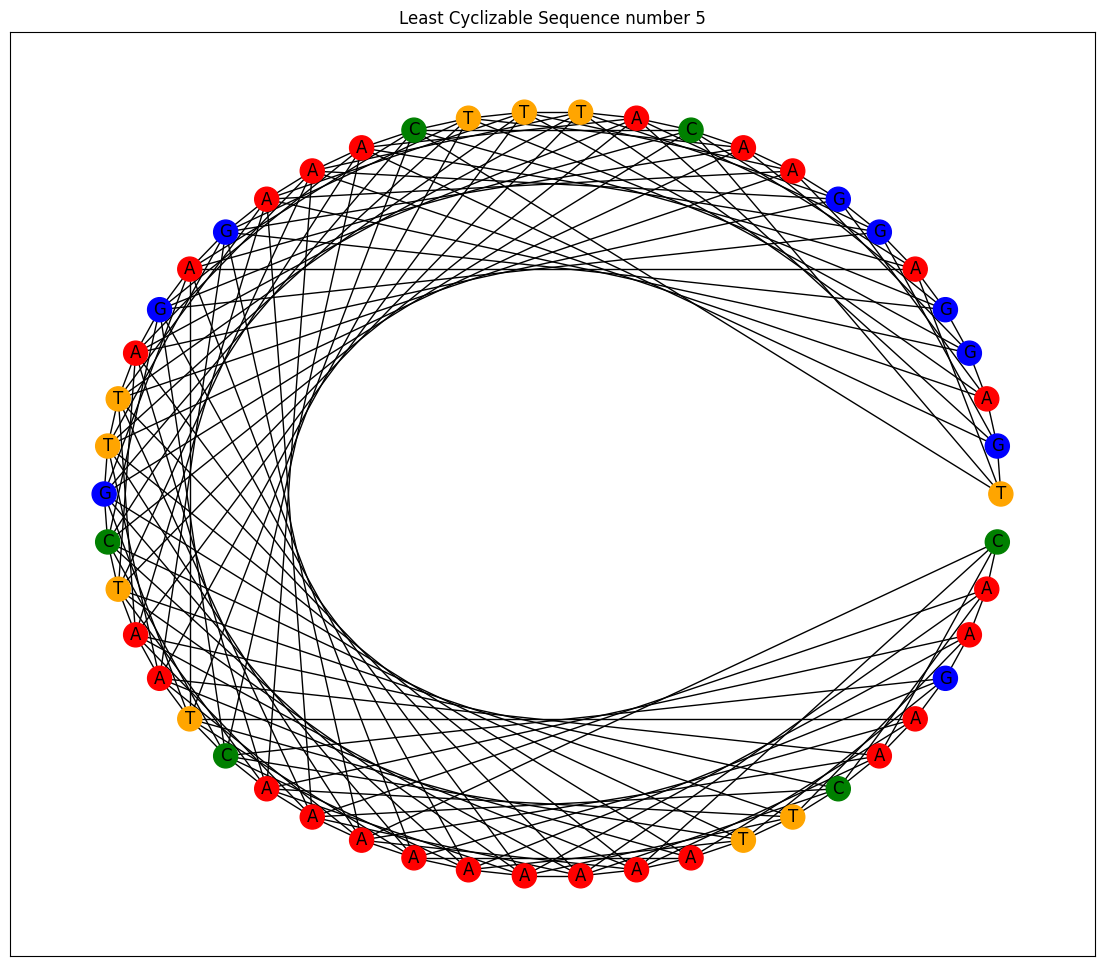

In [65]:
j=5
pd.DataFrame(tiling_data[which_graph][j*-1].x)
cur_data = Data(x=tiling_data[which_graph][j*-1].x, edge_index=tiling_data[which_graph][j*-1].edge_index)
plt.figure(figsize=(14,12))
g = torch_geometric.utils.to_networkx(cur_data, to_undirected=True, remove_self_loops=True)
plotting_labels = {node: str(node) for node in g.nodes()}
code = {0:"A", 1:"C", 2:"G", 3:"T"}
plotting_label_values = []
for i, intval in enumerate((tiling_data[which_graph][j*-1].x[:,:4] == 1).nonzero(as_tuple=True)[1]):
    plotting_label_values.append(code[intval.item()])
plotting_labels = {node: plotting_label_values[i] for i,node in enumerate(g.nodes())}

node_color_dict = {"A": "red", "C": "green", "G": "blue", "T": "orange"}
node_colors = []
for label in plotting_label_values:
    node_colors.append(node_color_dict[label])

print(tiling_data[which_graph][j*-1].y)

plotting_pos = nx.circular_layout(g)
nx.draw_networkx_labels(g, plotting_pos, labels=plotting_labels)
nx.draw_networkx_nodes(g,plotting_pos,label=plotting_labels, node_color=node_colors)
edges = nx.draw_networkx_edges(g,plotting_pos)
# nx.draw(g, labels=plotting_labels, pos=plotting_pos, node_color)
# plt.title(f"Original, edge length: {edge_length}")
plt.title(f"Least Cyclizable Sequence number {j}")
plt.show()